<span style="color:blue">*magic_data*</span>

# Формирование портрета потенциального клиента для Ростелекома

от команды magic_data

**Цель исследования:** на основе выявленных закономерностей в данных о продажах B2B клиентам за прошлые периоды сформировать рекомендации по повышению эффективности процесса по привлечению новых клиентов.

**Задачи исследования:**

1. Создать модель данных, позволяющую объединить исходные данные.

2. Провести предобработку данных, в том числе:
- проверить данные на валидность;
- проанализировать данные на предмет наличия пропусков, дубликатов, ошибок.

3. Провести разведочный анализ EDA, в том числе:
- анализ показателей описательной статистики по имеющимся признакам;
- выявление аномалий и выбросов;
- предварительный анализ корреляции между признаками, устранение мультиколлинеарности;
- преобразование данных (стандартизация, перевод категориальных переменных в бинарный вид);
- сформулировать гипотезы, выбрать модели и алгоритмы классификации потенциальных клиентов;
- проанализировать временной ряд на предмет станционарности, автокорреляции, наличия тренда и сезонности.

4. Реализовать алгоритмы машинного обучения, в том числе:
- провести разбиение выборки две части: train/test;
- обучить модели;
- сделать прогнозы;
- оценить метрики моделей;
- выбрать лучшие модели и на их основе сформировать разметку новых клиентов по склонности к подключению.

5. Составить портрет потенциального клиента.


6. Визуализировать результаты анализа.


7. Сформировать рекомендации по будущим продажам по каждому региону.

**Описание данных:**

Датасет представляет собой 5 excel файлов, в каждом из которых содержится информация по клиентам: потенциальным и сделавшими покупку в период с января 2023 года по июль 2023 года.


**Показатели:**

1. Данные по продажам - sales.xls:
- month_sale - месяц продажи,
- day_sale - день продажи (дата продажи),
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- sale_size - размер продажи («High» - большая покупка, «Middle» - средняя покупка, «Low» - малая покупка).

2. Данные по адресам клиентов - address_client.csv:
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- address - наименование адреса,
- flag_provider - наличие провайдеров-конкурентов на адресе, где 1 – есть информация о провайдерах, 0 – нет информации о провайдерах,
- nflag_have_free_ports - наличие технической возможности подключения на адресе, где 1 – есть техническая возможность, 0 – требуется уточнение,
- tech_name - наименование технологии подключения на адресе,
- latitude - координаты адреса (широта),
- longitude - координаты адреса (долгота).

3. Данные по сфере деятельности - okved_industry_client.csv:
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- сode_okved - код ОКВЭД,
- name_okved - наименование ОКВЭД,
- type_okved - тип ОКВЭД (1 – основной, 0 – дополнительный),
- industry - yаименование индустрии.

4. Данные по клиентам - base_info_client.csv:
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- name_rf - наименование филиала,
- id_client - номер клиента,
- workersrange - кол-во сотрудников, работающих в компании,
- total_revenue - общая выручка, указанная в млн руб. (0 – до 1 млн руб., 5 – до 5 млн руб. и т.д.)
- companywithsameinfo - кол-во компаний с похожей финансовой информацией,
- arbitrationcases - кол-во арбитражных дел,
- datefirstreg - дата регистрации юр. лица,
- flag_site - флаг наличия сайта у клиента, где 1 – сайт есть, 0 – сайта нет,
- flag_business_center - флаг присутствия в бизнес-центре, где 1 – да, 0 – нет,
- flag_resident - флаг присутствия в жилом доме, где 1 – да, 0 – нет,
- date_actual_data - дата актуализации данных,
- flag_vk - флаг наличия группы в VK, где 1 – да, 0 – нет.

5. Список клиентов для скоринга - final_list.csv:

- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал».


## 1. Предобработка данных и EDA

### Импортируем библиотеки и загрузим файлы

In [ ]:
#Попыталась сделать так, чтобы был общий доступ к датасетам, но, видимо, на моем копьютере установлена старая версия питона,
#поэтому выдоает ошибку, что имя urlencode не задано
#Да и залить на яндекс.диск я не смогла, видимо, интернет сегодня плохой или данные слишком большие.
#У кого есть желание, можете докрутить код, чтобы мы работали с одной и той же тетрадкой в дальнейшем.

#base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
 
#public_key_sales = 'https://disk.yandex.ru/i/Y2gL1bC5pXQ8gA'
#public_key_address_client = ''
#public_key_okved_industry_client = ''
#public_key_base_info_client = ''
#public_key_final_list = ''

#def loading_files_csv(public_key):
#    final_url = base_url + urlencode(dict(public_key=public_key))
#    response = requests.get(final_url)
#    download_url = response.json()['href']
#    return download_url

#sales_try = pd.read_csv(loading_files_csv(public_key_sales))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
from urllib.parse import urlencode
import requests

#import plotly.express as px
#from pandas.plotting import register_matplotlib_converters
#from urllib.parse import urlencode
#import requests
#import json
#from folium import Map, Choropleth, Marker
#from folium.plugins import MarkerCluster

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA, ARIMA

#from statsmodels.tsa.statespace.sarimax import SARIMAX
#import statsmodels.api as sm
#import warnings
#from datetime import timedelta

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.decomposition import PCA

**Загрузка датасетов и общая информация по ним**

In [2]:
address_client = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\address_client.csv',
                             encoding = "utf-8", on_bad_lines='skip',
                             names=['id_client_rf', 'address', 'flag_provider', 'nflag_have_free_ports',
                                    'tech_name', 'latitude', 'longitude'])

base_info_client = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\base_info_client.csv',
                               encoding = "utf-8", names=['id_client_rf', 'name_rf', 'id_client',
                                                          'workersrange', 'total_revenue', 'companywithsameinfo',
                                                          'arbitrationcases', 'datefirstreg', 'flag_site',
                                                          'flag_business_center', 'flag_resident', 'date_actual_data',
                                                          'flag_vk'], parse_dates=['datefirstreg','date_actual_data'])

final_list = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\final_list.csv',
                         encoding = "utf-8", names=['id_client_rf'])

okved_industry_client = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\okved_industry_client.csv',
                                    encoding = "utf-8", names = ['id_client_rf', 'Code_okved', 'Name_okved',
                                                                 'Type_okved', 'Industry'])
sales = pd.read_excel(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\sales.xlsx',
                      names = ['month_sale', 'day_sale', 'id_client_rf', 'sale_size'])

In [3]:
pd.set_option('display.max_columns', 50)
print('Размерность address_client:', address_client.shape[0])
print(address_client.info())
print('\n')
print('Размерность base_info_client:', base_info_client.shape[0])
print('\n')
print(base_info_client.info())
print('Размерность final_list:', final_list.shape[0])
print('\n')
print(final_list.info())
print('Размерность okved_industry_client:', okved_industry_client.shape[0])
print('\n')
print(okved_industry_client.info())
print('Размерность sales:', sales.shape[0])
print(sales.info())

Размерность address_client: 1485674
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485674 entries, 0 to 1485673
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id_client_rf           1485674 non-null  object 
 1   address                1485674 non-null  object 
 2   flag_provider          1485674 non-null  int64  
 3   nflag_have_free_ports  1485674 non-null  int64  
 4   tech_name              736940 non-null   object 
 5   latitude               1259978 non-null  float64
 6   longitude              1259978 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 79.3+ MB
None


Размерность base_info_client: 2218328


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218328 entries, 0 to 2218327
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_client_rf          int64         
 1   name_rf     

In [4]:
# Проверка кол-ва уникальных значений для столбцов, где должно быть булево значение
print('address_client:\n', address_client.nunique(), sep='')
print()
print('base_info_client:\n', base_info_client.nunique(), sep='')
print()
print('final_list:\n', final_list.nunique(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.nunique(), sep='')
print()
print('sales:\n', sales.nunique(), sep='')

address_client:
id_client_rf             587676
address                  183457
flag_provider                 2
nflag_have_free_ports         2
tech_name                    40
latitude                 114296
longitude                116575
dtype: int64

base_info_client:
id_client_rf            2218328
name_rf                      13
id_client               2218328
workersrange                 11
total_revenue              1559
companywithsameinfo         135
arbitrationcases            575
datefirstreg              12865
flag_site                     2
flag_business_center          2
flag_resident                 2
date_actual_data           4551
flag_vk                       2
dtype: int64

final_list:
id_client_rf    1950766
dtype: int64

okved_industry_client:
id_client_rf    2139266
Code_okved         2470
Name_okved         2396
Type_okved            2
Industry             33
dtype: int64

sales:
month_sale         7
day_sale         193
id_client_rf    9316
sale_size          3


In [5]:
# 1. address_client
address_client.head()

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude
0,00840127_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
1,00840181_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
2,00839528_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
3,00839607_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
4,00075449_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN


In [6]:
# 2. base_info_client
base_info_client.head()

,id_client_rf,name_rf,id_client,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0
1,1631368,Ф09,01631368_Ф09,NaN,0,1.0,NaN,2020-07-31,0,0,0,NaT,0
2,1631377,Ф09,01631377_Ф09,NaN,0,1.0,NaN,2020-08-17,0,0,0,NaT,0
3,1631387,Ф09,01631387_Ф09,NaN,0,1.0,NaN,2019-12-23,0,0,0,NaT,0
4,1631409,Ф09,01631409_Ф09,NaN,0,1.0,NaN,2020-10-19,0,0,0,NaT,0


In [7]:
# Смотрим в каком формате хранятся записи workersrange. Нужно будет оставить только правую часть.
# base_info_client[base_info_client['workersrange'].notnull()==True]
# Переводим workersrange в числовой формат по правой цифре. 
base_info_client['workersrange'] = base_info_client['workersrange'].str.replace('(.* \.\. )|(.*\.\.)','', regex=True).dropna().astype(int)
# Переводим id_client_rf в такой же формат, как и в других таблицах
base_info_client['id_client_rf'] = base_info_client['id_client_rf'].astype(str)+'_'+base_info_client['name_rf'].astype(str)

In [8]:
# 3. final_list
final_list.head()

,id_client_rf
0,01768987_Ф04
1,01769012_Ф04
2,01769016_Ф04
3,01769018_Ф04
4,01769044_Ф04


In [9]:
# 4. okved_industry_client
okved_industry_client.head()

,id_client_rf,Code_okved,Name_okved,Type_okved,Industry
0,00811390_Ф13,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
1,01516426_Ф10,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
2,01258497_Ф06,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
3,01583065_Ф12,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
4,01506195_Ф04,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес


In [10]:
# 5. sales
sales.head()
# sales['sale_size'].unique()

,month_sale,day_sale,id_client_rf,sale_size
0,2023-03-01,2023-03-16,00309682_Ф12,High
1,2023-03-01,2023-03-16,00309999_Ф12,High
2,2023-03-01,2023-03-07,00333129_Ф12,High
3,2023-03-01,2023-03-24,00333306_Ф12,High
4,2023-03-01,2023-03-07,00333741_Ф12,High


In [11]:
# Анализ пропусков
print('address_client:\n', address_client.isna().sum(), sep='')
print()
print('base_info_client:\n', base_info_client.isna().sum(), sep='')
print()
print('final_list:\n', final_list.isna().sum(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.isna().sum(), sep='')
print()
print('sales:\n', sales.isna().sum(), sep='')

address_client:
id_client_rf                  0
address                       0
flag_provider                 0
nflag_have_free_ports         0
tech_name                748734
latitude                 225696
longitude                225696
dtype: int64

base_info_client:
id_client_rf                  0
name_rf                       0
id_client                     0
workersrange            2216478
total_revenue                 0
companywithsameinfo     1321582
arbitrationcases        1781086
datefirstreg              10800
flag_site                     0
flag_business_center          0
flag_resident                 0
date_actual_data        1751900
flag_vk                       0
dtype: int64

final_list:
id_client_rf    0
dtype: int64

okved_industry_client:
id_client_rf      0
Code_okved        0
Name_okved        0
Type_okved        0
Industry        236
dtype: int64

sales:
month_sale      0
day_sale        0
id_client_rf    0
sale_size       0
dtype: int64


In [12]:
# Анализ явных дубликатов
print('address_client:\n', address_client.duplicated().sum())
print()
print('base_info_client:\n', base_info_client.duplicated().sum())
print()
print('final_list:\n', final_list.duplicated().sum())
print()
print('okved_industry_client:\n', okved_industry_client.duplicated().sum())
print()
print('sales:\n', sales.duplicated().sum())

address_client:
 0

base_info_client:
 0

final_list:
 0

okved_industry_client:
 0

sales:
 0


**Преобразование признаков**

In [13]:
# Переводим sale_size в цифровой формат
sales['sale_size'] = np.where(sales['sale_size']=='High     ', 3,
 np.where(sales['sale_size']=='Middle   ', 2,
 np.where(sales['sale_size']=='Low      ', 1, 0)))
sales['sale_size'].value_counts()

3    7286
1    2390
2     752
Name: sale_size, dtype: int64

In [14]:
#меняем заголовки местами
base_info_client.rename(columns={'id_client_rf': 'id_client', 'id_client': 'id_client_rf'}, inplace=True)
base_info_client.head(1)

,id_client,name_rf,id_client_rf,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354_Ф09,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0


In [15]:
#преобразуем month_sale
month_sale_mapping = {'2023-01-01': 1, '2023-02-01': 2, '2023-03-01': 3,
                      '2023-04-01': 4, '2023-05-01': 5, '2023-06-01': 6, '2023-07-01': 7}
sales['month_sale'] = sales['month_sale'].replace(month_sale_mapping)
sales['month_sale'].value_counts()

3    1842
4    1578
2    1566
6    1468
5    1454
7    1348
1    1172
Name: month_sale, dtype: int64

In [16]:
#преобразование признака workersrange
base_info_client['workersrange'] = base_info_client['workersrange'].fillna(value=0)
def get_workersrange_is_known(workersrange):
    if workersrange == 0:
        x = 0
    else:
        x = 1
    return x
def get_workersrange_is_less_then_5(workersrange):
    if workersrange == 5:
        x = 1
    else:
        x = 0
    return x
def get_workersrange_is_more_then_5(workersrange):
    if workersrange > 5:
        x = 1
    else:
        x = 0
    return x
base_info_client['workersrange_is_known'] = base_info_client['workersrange'].apply(get_workersrange_is_known)
base_info_client['workersrange_is_less_then_5'] = base_info_client['workersrange'].apply(get_workersrange_is_less_then_5)
base_info_client['workersrange_is_more_then_5'] = base_info_client['workersrange'].apply(get_workersrange_is_more_then_5)

In [17]:
base_info_client['workersrange_is_known'].value_counts()

0    2216478
1       1850
Name: workersrange_is_known, dtype: int64

In [18]:
base_info_client['workersrange_is_less_then_5'].value_counts()

0    2217008
1       1320
Name: workersrange_is_less_then_5, dtype: int64

In [19]:
base_info_client['workersrange_is_more_then_5'].value_counts()

0    2217798
1        530
Name: workersrange_is_more_then_5, dtype: int64

In [20]:
#заполнение пропусков companywithsameinfo
base_info_client['companywithsameinfo'] = base_info_client['companywithsameinfo'].fillna(value=0)
base_info_client['companywithsameinfo'].value_counts()

0.0      1321586
1.0       597766
2.0       147444
3.0        58514
4.0        30802
          ...   
116.0          2
161.0          2
156.0          2
83.0           2
213.0          2
Name: companywithsameinfo, Length: 135, dtype: int64

In [21]:
#заполнение пропусков arbitrationcases
base_info_client['arbitrationcases'] = base_info_client['arbitrationcases'].fillna(value=0)
base_info_client['arbitrationcases'].value_counts()

0.0       1781196
1.0        124988
2.0         69408
3.0         45444
4.0         31344
           ...   
1016.0          2
359.0           2
3449.0          2
2132.0          2
864.0           2
Name: arbitrationcases, Length: 575, dtype: int64

In [22]:
#заполнение пропусков date_actual_data
base_info_client['date_actual_data'] = base_info_client['date_actual_data'].fillna(value=base_info_client['datefirstreg'])
base_info_client['date_actual_data'].value_counts()

2021-06-25    3728
2011-11-16    3676
2021-06-18    3180
2011-09-27    2934
2011-09-01    2668
              ... 
2004-08-21       2
1965-01-18       2
1989-09-25       2
1979-03-16       2
2021-08-08       2
Name: date_actual_data, Length: 12969, dtype: int64

In [23]:
#преобразование tech_name
base_info_client['tech_name'] = base_info_client['date_actual_data'].fillna(value='unknown')
base_info_client['tech_name'].value_counts()

2021-06-25 00:00:00    3728
2011-11-16 00:00:00    3676
unknown                3232
2021-06-18 00:00:00    3180
2011-09-27 00:00:00    2934
                       ... 
2004-08-21 00:00:00       2
1965-01-18 00:00:00       2
1989-09-25 00:00:00       2
1979-03-16 00:00:00       2
2021-08-08 00:00:00       2
Name: tech_name, Length: 12970, dtype: int64

In [24]:
tech_dummies = pd.get_dummies(address_client['tech_name'].str.split(', ', expand=True), dummy_na=True) 
tech_dummies.columns = tech_dummies.columns.map(lambda x: x.replace('\\', '').split('_')[-1]) 
tech_dummies = tech_dummies.groupby(lambda x: x, axis=1).max() 
address_client = pd.concat([address_client, tech_dummies], axis=1) 
address_client.head()

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,ETTH,FTTx,PON,nan,xDSL,БШПД,Оптика
0,00840127_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,0,0,0,1,0,0,0
1,00840181_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,0,0,0,1,0,0,0
2,00839528_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,0,0,0,1,0,0,0
3,00839607_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,0,0,0,1,0,0,0
4,00075449_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN,0,0,0,1,0,0,0


In [25]:
#оставляем только основную деятельность
okved = okved_industry_client[okved_industry_client['Type_okved'] == 1]

In [26]:
#Доработайте, пожалуйтса, код, у меня высвечивается предупреждение.

#оставляем только первые 2 цифры кода
#okved.loc['Code_okved'] = okved['Code_okved'].str.slice(0, 2)

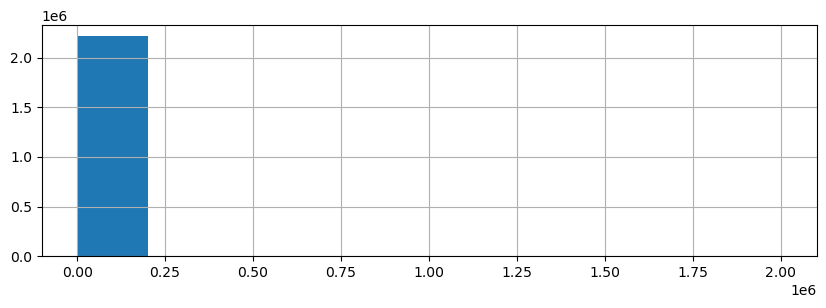

In [27]:
#убираем выбросы по total_revenue
base_info_client['total_revenue'].hist(figsize=(10, 3));

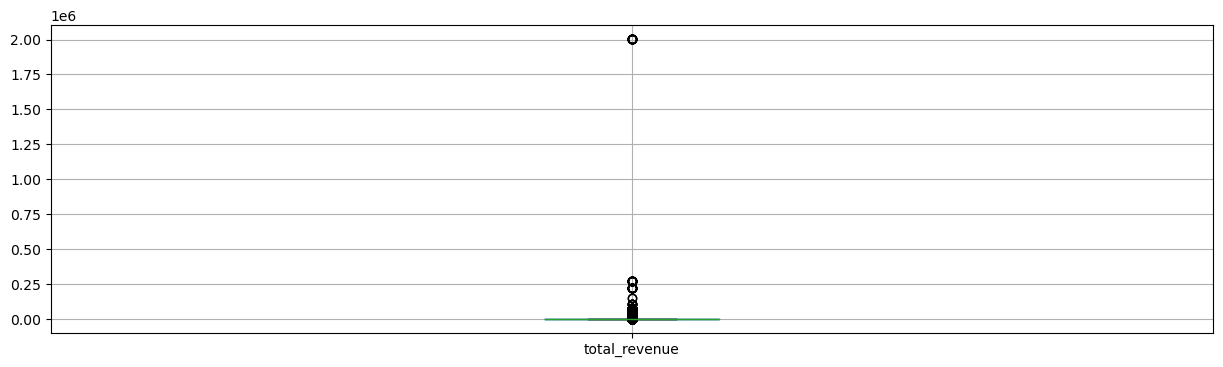

In [28]:
plt.figure(figsize=(15, 4))
base_info_client.boxplot('total_revenue')
plt.show()

In [29]:
np.percentile(base_info_client['total_revenue'], [90, 95, 99])

array([ 12.,  44., 242.])

In [30]:
#Удалим по 99-му перцентилю
base_info_client_corr = base_info_client[base_info_client['total_revenue'] < 242]

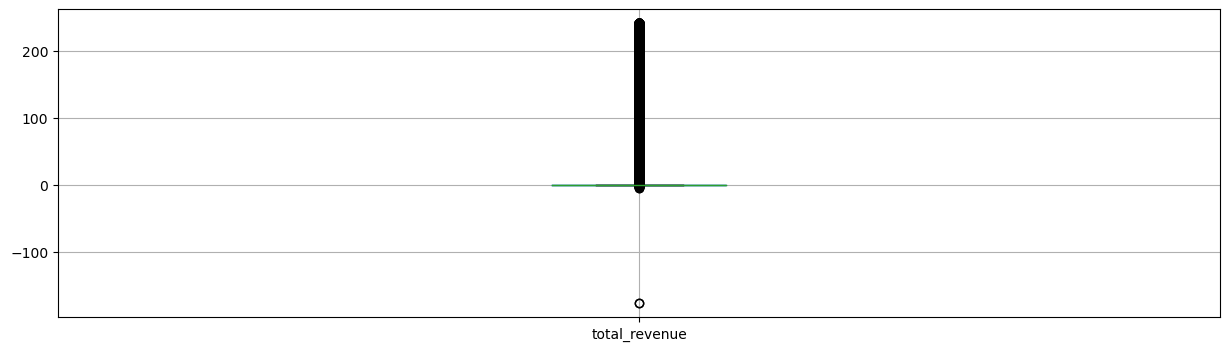

In [31]:
plt.figure(figsize=(15, 4))
base_info_client_corr.boxplot('total_revenue')
plt.show()

In [32]:
base_info_client_corr[base_info_client_corr['total_revenue'] < 0]['total_revenue'].count()

22

In [33]:
#земеним нулем то, что меньше нуля
base_info_client_corr.loc[base_info_client_corr['total_revenue'] < 0, ['total_revenue']] = 0

In [34]:
sales_clients = sales.groupby('id_client_rf')\
                     .agg(month_sale=('month_sale', 'min'),
                          sale_size=('sale_size', 'max'),
                          sale_count=('sale_size', 'count'))\
                     .sort_values('sale_count', ascending = False)

In [35]:
#вводим показатель количества дней с момента регистрации до подключения
df_delta_date = sales_clients.merge(base_info_client, how='left', on='id_client_rf' )  
df_delta_date['delta_date'] = (df_delta_date['month_sale'] - df_delta_date['datefirstreg']).astype('int64')/ 10**9

TypeError: cannot subtract DatetimeArray from ndarray

In [ ]:
final_data_sales.info()

In [ ]:
final_data_sales = sales_clients.merge(okved, how='left', on='id_client_rf')\
                  .merge(base_info_client, how='left', on='id_client_rf')\
                  .merge(address_client, how='left', on='id_client_rf')\
                  .merge(df_delta_date[['delta_date', 'id_client_rf']], how='left', on='id_client_rf')

In [ ]:
final_data_sales.info()

In [ ]:
final_data_predict = final_list.merge(okved, how='left', on='id_client_rf' )\
                  .merge(base_info_client, how='left', on='id_client_rf')\
                  .merge(address_client, how='left', on='id_client_rf')\
                  .merge(df_delta_date[['delta_date', 'id_client_rf']], how='left', on='id_client_rf')

In [ ]:
final_data_predict.info()

In [ ]:
final_data_predict.count()

In [ ]:
data_train = final_data_sales

In [ ]:
data_train['sale_size'] = pd.Categorical(data_train['sale_size'], categories=['High', 'Middle', 'Low'], ordered=True)
data_train = data_train.sort_values('sale_size', ascending=False).drop_duplicates(['id_client_rf'])

In [ ]:
data_train = data_train[data_train['flag_business_center'].isna() == False]

In [ ]:
data_train.info()

In [ ]:
# Функция определения ближайших компаний
from tqdm.notebook import tqdm 
from math import radians, sin, cos, sqrt, atan2 
pbar = tqdm() 
def haversine(lat1, lon1, lat2, lon2): 
    R = 6371  # radius of the earth in km 
    dlat = radians(lat2 - lat1) 
    dlon = radians(lon2 - lon1) 
    a = sin(dlat / 2)  2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)  2 
    c = 2 * atan2(sqrt(a), sqrt(1 - a)) 
    return R * c * 1000  # distance in meters 
 
df = address_client[address_client['latitude'].notnull()==True].head(5000) 
df['has_nearby_company'] = 0 
 
pbar.reset(total=len(df)) 
for i, row in df.iterrows(): 
    lat1, lon1 = row['latitude'], row['longitude'] 
    for j, other_row in df.iterrows(): 
        if i != j: 
            lat2, lon2 = other_row['latitude'], other_row['longitude'] 
            dist = haversine(lat1, lon1, lat2, lon2) 
            if dist <= 50: 
                df.at[i, 'has_nearby_company'] = 1 
                break 
    pbar.update()              
pbar.refresh() 
 
df.head()

### Анализ описательной статистики

In [ ]:
data.describe()

In [ ]:
print(
      'Коэффициент вариации:{:.2%}'.format(
       np.std(data[''])/data[''].mean()
        )
      )

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='', y='', data=)

plt.show()

In [ ]:
#приблизим
plt.figure(figsize=(20, 5))
sns.boxplot(x='platform', y='total_sales', data=relevant_data_var)
plt.ylim(0, 3)

plt.show()

### Анализ мультиколлинеарности

In [ ]:
#матрица корреляции
corr_matrix = data.corr()
fig, ax = plt.subplots()

In [ ]:
#тепловая карта для матрицы корреляции
sns.heatmap(corr_matrix, annot=True, square=True)
ax.set_ylim(7, 0)
plt.show()

In [ ]:
#диаграммы рассеяния для взаимосвязи показателей с целевой переменной
for col in data.drop('Целевая переменная', axis = 1).columns:
    sns.scatterplot(data=data, x=col, y=cars['Целевая пересенная'])
    plt.show()

In [ ]:
#преобразование категориальных переменных в бинарный вид

data[] = pd.get_dummies(data[])
data.head()

### Выводы по разделу:

1. 
2. 

## 2. Анализ временного ряда

Для начала посмотрим на динамику показателя ??? и его скользящее среднее за ???

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(data[''], label = '???', color = 'steelblue')
plt.plot(data[''].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.xlabel('Месяцы???', fontsize = 14)
plt.ylabel('???', fontsize = 14)
plt.title('???', fontsize = 16)
plt.show()

**Разложение ряда на компоненты**

In [ ]:
rcParams['figure.figsize'] = 11, 9
decompose = seasonal_decompose(data[''])
decompose.plot()
plt.show()

**Проверка на стационарность**

In [ ]:
# тест Дики-Фуллера
adf_test = adfuller(data[''])
print('p-value = ' + str(adf_test[1]))

Стационарен, если есть p-value меньше 0,05 - можем отвергнуть нулевую гипотезу о нестационарности процесса.

Если стационарен - тренд можно не выявлять.

**Проверка наличия автокорреляции**

In [ ]:
plot_acf(data[''], lags=np.arange(12))
plt.show()

In [ ]:
#уточним значение для лага, с наибольшей автокорреляцией
np.round(np.corrcoef(data[''][:-1], data[''][1:])[0,1], 2)

**Выделение тренда**

*Экспоненциальное сглаживание*

In [ ]:
alpha = 0.2
 
exp_smoothing = [data[''][0]]
for i in range(1, len(data[''])):
    exp_smoothing.append(alpha * data[''][i] + (1 - alpha) * exp_smoothing[i - 1])

In [ ]:
#создание датафрейма с экспоненциальным сглаживанием
trend_exp_sm = data[['Дата', '&&&']]
trend_exp_sm['Exp_smoothing'] = exp_smoothing
last_date = trend_exp_sm['Дата'].iloc[[-1]]
last_date = last_date + timedelta(days = 1)
trend_exp_sm = trend_exp_sm.append(pd.DataFrame(trend_exp_sm['Дата'] = last_date))
trend_exp_sm['Exp_smoothing'] = trend_exp_sm['Exp_smoothing'].shift(1)
trend_exp_sm.head()

In [ ]:
trend_exp_sm.tail()

In [ ]:
#график
plt.figure(figsize = (15,8))
plt.plot(trend_exp_sm[''], label = '', color = 'steelblue')
plt.plot(trend_exp_sm['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.xlabel('Месяцы???', fontsize = 14)
plt.title('???', fontsize = 16)
 
plt.show()

*ARMA (для стационарных данных)*

In [ ]:
#датасет для анализа динамики
data_for_models = data[['Дата', '']]
data_for_models.set_index('Дата', inplace=True)

In [ ]:
#модель ARMA
model_arma = ARMA(data_for_models[''],order=(2,2))
model_arma_fit = model_arma.fit()

model_arma_fit.summary()

In [ ]:
#сравнение с реальным значением
data_for_models['forecast_ARMA'] = model_arma_fit.predict(start = !!!92, end= !!!114, dynamic= True)  
data_for_models[['', 'forecast_ARMA']].plot(figsize=(8, 5))

*ARIMA (для нестационарных данных)*

In [ ]:
model_arima = ARIMA(data[''],order=(2,1,2))
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

In [ ]:
data_for_models['forecast_ARIMA'] = model_arima_fit.predict(start = 92, end= 114, dynamic= True)  
data[['', 'forecast_ARIMA']].plot(figsize=(8, 5))

*SARIMA (учитывает сезонность)*

In [ ]:
#!!!Здесь проверить точно ли это SARIMA, а не SARIMAX
model_sarima = sm.tsa.statespace.SARIMAX(data[''],order=(2,1,2),seasonal_order=(2,1,2,6))
model_sarima_fit = model_sarima.fit()
model_sarima_fit.summary()

In [ ]:
data['forcast_SARIMA'] = model_arima_fit.predict(start=99, end=112, dynamic=True)
data[['','forcast_SARIMA']].plot(figsize=(20, 5))

*SARIMAX (учитывает экзогенные факторы)*

In [ ]:
train = data_for_models[:'1959-12']
test = data_for_models['1960-01':]

#warnings.simplefilter(action = 'ignore', category = Warning)
 
model_sarimax = SARIMAX(train, order = (3, 0, 0), seasonal_order = (0, 1, 0, 12))
model_sarimax_fit = model.fit()
model_sarimax_fit.summary()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_sarimax_fit.predict(start, end)

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('&&&')
plt.xlabel('Месяцы')
plt.grid()
plt.show()

Для лучшией модели посмотри еще метрики среднеквадратической ошибки (MSE) и корня среднеквадратической ошибки (RMSE) для оценки качества.

In [ ]:
print('Среднеквадратическая ошибка (MSE): ', mean_squared_error(test, predictions))
print('Корень среднеквадратической ошибки (RMSE): ', np.sqrt(mean_squared_error(test, predictions)))

**Прогнозирование**

In [ ]:
#Создание последующих дат для прогнозирования

import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= data.columns)
data = pd.concat([data, future])

In [ ]:
#прогнозирование по лучшей модели

data['future_prediction']=result.predict(start=113, end=130, dynamic=True)
data[['avg monthly busride','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

**Выводы по разделу:**

1. 
2. 

## 3. Реализация алгоритмов машинного обучения

Реализуем следующие алгоритмы машинного обучения:

- линейная регрессия (стандартная, а также с L1- и с L2-регуляризацией)
- логистическая регрессия (с решателями liblinear, sag и saga),
- дерево принятия решений,
- случайный лес,
- градиентный бустинг.

Cначала разделим выборки на обучающую/валидационную, проведем стандартизацию данных. Далее сделаем прогноз, сравним метрики и выберем лучшие модели.

### Обучение с учителем: регрессия

!!! Здесь попробуем добавить период в список факторов, чтобы невилировать влияние тренда, если таковой имеется.

In [ ]:
#разделение на x/y
X = data.drop('Целевая переменная', axis = 1)
y = data['Целевая переменная']


#Здесь скорее всего, будет привязка ко времени, нужно будет разделить с ее учетом
y_train = data[''][data['Дата'] < '']
y_test = data[''][data['Дата'] >= '']
X_train = data[data['Дата'] < ''].drop([''], axis = 0)
X_test = data[data['Дата'] >= ''].drop([''], axis = 0)

#или
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#стандартизация
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [ ]:
#зададим функцию MAPE (средняя абсолютная процентная ошибкя):
def calc_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
#зададим функцию для расчета разных моделей линейной регрессии:
def liner_model_func(m, X_train_st, X_test_st, y_train, y_test):
    model = m
    model.fit(X_train_st, y_train)
    pred = model.predict(X_test_st)
    features = pd.DataFrame({'feature': X_train.columns, 'coeff': model.coef_})
    features['coeff_abs'] = abs(features['coeff'])
    intercept = model.intercept_
    features = featureso.sort_values(by=['coeff_abs'], ascending=False)
    # вывод метрик
    print('\n', m, '\n')
    print('MAE (средний модуль ошибки): {:.2f}'.format(mean_absolute_error(y_test, pred)))
    print('MSE (средняя квадратичная ошибка): {:.2f}'.format(mean_squared_error(y_test, pred)))
    print('RMSE (корень из MSE): {:.2f}'.format(mean_squared_error(y_test, pred)**0.5))
    print('R2: {:.2f}'.format(r2_score(y_test, pred)))
    print('MAPE (средняя абсолютная процентная ошибкя): {:.2f}'.format(mape(y_test, pred)))

In [ ]:
#стандартная линейная регрессия
liner_model_func(LinearRegression(), X_train_st, X_test_st, y_train, y_test)

In [ ]:
#Lasso-регрессия (L1-регуляризация):
liner_model_func(Lasso(), X_train_st, X_test_st, y_train, y_test)

In [ ]:
#Ridge-регрессия (L2-регуляризация):
liner_model_func(Ridge(), X_train_st, X_test_st, y_train, y_test)

In [ ]:
#Дерево принятия решений:
liner_model_func(DecisionTreeRegressor(), X_train_st, X_test_st, y_train, y_test)

In [ ]:
#Случайный лес:
liner_model_func(RandomForestRegressor(), X_train_st, X_test_st, y_train, y_test)

In [ ]:
#Градиентный бустинг:
liner_model_func(GradientBoostingRegressor(), X_train_st, X_test_st, y_train, y_test)

Лучшими метриками обладают ??? модели. Для дальнейшей интерпретации будем использовать ???

Проанализируем значимость признаков в модели.

In [ ]:
final_model = GradientBoostingRegressor(random_state=0) #или другая модель
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

feat_importance = pd.DataFrame(data = {'feature': X.columns, 'importances': final_model.feature_importances_})
final_data.sort_values(by='importances')

**Наиболее важными признаками оказались:**

1. 
2. 

### Обучение с учителем: бинарная классификация

Добавим в датафрейм бинарную целевую переменную, содержащую факт покупки. И заново разделим выборку и проведем стандартизацию.

In [ ]:
data['Факт покупки'] = [1 for i in data['???'] if i not 0]

print('Получившееся распределение по группам:\n', data['Факт покупки'].value_counts())

In [ ]:
#разделение на x/y
X_b = data.drop(['Факт покупки', 'Целевой пок-ль из линейной регр'], axis = 1)
y_b = data['Факт покупки']

#Здесь скорее всего, будет привязка ко времени, нужно будет разделить с ее учетом
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2)

#стандартизация
scaler = StandardScaler()
scaler.fit(X_b_train)
X_b_train_st = scaler.transform(X_b_train)
X_b_test_st = scaler.transform(X_b_test)

In [ ]:
#зададим функцию для расчета разных моделей бинарной классификации:
def binary_class_func(m, X_b_train, X_b_test, y_b_train, y_b_test):
    model = m
    model.fit(X_b_train_st, y_b_train)
    probabilities = model.predict_proba(X_b_test)[:, 1]
    predictions = model.predict(X_b_test)
    print('\n', m, '\n')
    print('Accuracy (доля правильных ответов): {:.2f}'.format(accuracy_score(y_b_test, predictions)))
    print('Precision (точность): {:.2f}'.format(precision_score(y_b_test, predictions)))
    print('Recall (полнота!): {:.2f}'.format(recall_score(y_b_test, predictions)))
    print('F1: {:.2f}'.format(f1_score(y_b_test, predictions)))
    print('AUC-ROC (площадь под кривой ошибок): {:.2f}'.format(roc_auc = roc_auc_score(y_b_test, probabilities[:,1])))

In [ ]:
#стандартная логистическая регрессия
binary_class_func(LogisticRegression(solver='liblinear'), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#логистическая регрессия с решателем sag (L2)
binary_class_func(LogisticRegression(solver='sag'), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#логистическая регрессия с решателем saga
binary_class_func(LogisticRegression(solver='saga'), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#дерево принятия решений
binary_class_func(DecisionTreeClassifier(), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#случайный лес
binary_class_func(RandomForestClassifier(n_estimators = 100), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#градиентный бустинг
binary_class_func(GradientBoostingClassifier(n_estimators = 100), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#метод опорных векторов
binary_class_func(SVC(kernel='linear'), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

In [ ]:
#метод K-ближайших соседей
binary_class_func(KNeighborsRegressor(n_neighbors=5), X_b_train_st, X_b_test_st, y_b_train, y_b_test)

Лучшими метриками обладают ??? модели. Поэтому прогнозировать принадлежность потенциального клиента к тому или иному классу будем на основе ???


Также можно доработать модель логистической регрессии, поэкспериментировав с порогом отнесения к классу вероятных клиентов. Поскольку нам важно не потерять потенциального клиента, то порог будем постепенно уменьшать. В качестве пороговых значений будем использовать 0.45, 0.40, 0.35 и 0.30.

In [ ]:
model_log = LogisticRegression(solver='liblinear', random_state=0)
model_log.fit(X_b_train_st, y_b_train)
predictions = model_log.predict(X_b_test_st)
probabilities = model_log.predict_proba(X_b_test_st)[:,1]
print('Accuracy (доля правильных ответов): {:.2f}'.format(accuracy_score(y_b_test, predictions)))
print('Precision (точность): {:.2f}'.format(precision_score(y_b_test, predictions)))
print('Recall (полнота!): {:.2f}'.format(recall_score(y_b_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_b_test, predictions)))
print('AUC-ROC (площадь под кривой ошибок): {:.2f}'.format(roc_auc = roc_auc_score(y_b_test, probabilities[:,1])))

In [ ]:
thresholds = [0.45, 0.4, 0.35, 0.3]

for threshold in thresholds:
    custom_predictions = [0 if i < threshold else 1 for i in probabilities]
    print('Метрики для прогноза с порогом ', i)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_b_test, custom_predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_b_test, custom_predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_b_test, custom_predictions)))
    print('F1: {:.2f}'.format(f1_score(y_b_test, custom_predictions)))

Выбор лучшей модели

### Обучение без учителя: кластеризация

Для кластеризации потенциальных клиентов реализуем алгоритм на основе метода к-средних (k-means).

In [ ]:
#стандартизация
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#модель
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)
data['clusters'] = labels

print('Средние значения признаков по кластерам \n', data.groupby(['clusters']).mean())

In [ ]:
#график кластеризации
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show() 

In [ ]:
# Метрика силуэта
print('Silhouette score (метрика силуэта): {:.2f}'.format(silhouette_score(X_sc, labels)))

Вывод

### Уменьшение размерности данных с помощью метода главных компонент

Для того чтобы лучше понять, как взаимосвязаны между собой факторы, влияющие на склонность клиетов к покупке воспользуемся методом PCA.

In [ ]:
# Применение PCA с 2мя компонентами
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("Визуализация данных с PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

Посмотрим, какие факторы больше всего повлияли на эти компоненты.

In [ ]:
# Получение собственных векторов (весов) главных компонент
eigen_vectors = pca.components_

# Визуализация весов для первых нескольких компонент


# !!!!! Здесь нужно будет доработать код. Если не получится, то вывести просто веса главных компонент.
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(eigen_vectors[i].reshape(имя_изображения), cmap='viridis')
    plt.title(f"Главная компонента {i + 1}")
    plt.axis('off')
plt.show()

In [ ]:
 Попробуем использовать метод главных компонент для улучшения качества кластеризации.

In [ ]:
# Кластеризация после применения PCA
kmeans_pca = KMeans(n_clusters=5)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_sc[:, 0], X_sc[:, 1], c=labels, cmap='viridis')
plt.title("Кластеризация без PCA")
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title("Кластеризация после PCA")
plt.show()

Вывод: 

**Выводы по разделу:**

1. 
2. 

## 4. Портрет потенциального клиента

In [ ]:
data.groupby('').mean()

data.pivot_table(index='', values='', aggfunc=['',''])

Вывод

## 5. Визуализация

### Дашборд

Ссылка на дашборд:


[Дашборд "!!!"](https://public.tableau.com/app/profile/anna7527/viz/_16738687084650/Dashboard1?publish=yes "!!!") 


Дашборд содержит:
- ;
- ;
- .

### Визуализация в Unity3d

Ссылка:


Даш содержит:

In [ ]:
#Загрузка файла для дашборда:
#data_by_purchase.to_csv('data_by_purchase.csv', index = False)

## 6. Презентация

Ссылка на презентацию:


[Презентация "Формирование портрета потенциального клиента для Ростелекома от команды magic_data"](https://disk.yandex.ru/i/1CwfdbHipeEUSg "Формирование портрета потенциального клиента для Ростелекома от команды magic_data") 


## Общий вывод

**Что можно еще сделать?**

I. Можно еще дополнительно поразбиратьcя в агломеративной кластеризации и DBSCAN, KNN, CatBoost и LightGBM.

II. Можно посчитать какой-нибудь агрегатный показатель на основе факторов, полученных методом главных компонент. Например, с помощью многомерной средней с весами в виде общностей. По каждому субъету РФ. И визуализировать с помощью фоновой картограммы Choropleth

III. Можно взять какие-то данные из внешних источников и дополнить понециал по регионам. Например, количество домохозяйств по субъектам РФ, не подключенных к РТК, или количество новых зданий в субъекте. Количество новых домов можно попробовать получить с сайта: https://dom.mingkh.ru/
Потом можно визуализировать с помощью маркеров из folium и с помощью той же Choropleth.

IV. Можно рассчитать показатели продаж по полному кругу клиентов и по выделенным кластерам, проверить статистические гипотезы:

- средняя покупка у клиентов из разных кластеров разная (t-тест):
```
H_0: средняя покупка кластера 1 = средняя покупка кластера 2
H_1: средняя покупка кластера 1 ≠ средняя покупка кластера 2
alpha = 0.05
```
- доля клиентов, совершивших покупку, в разных кластерах разная (z-тест):
```
H_0: доля  клиентов, совершивших событие, в кластере 1 = доля клиентов, совершивших событие, в кластере 2
H_1: доля  клиентов, совершивших событие, в кластере 1 ≠ доля клиентов, совершивших событие, в кластере 2
alpha = 0.05
```

# Черновики

In [ ]:
#моя старая mape на случай, если новая не сработает
def mape_old(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape = perc_error_abs.sum() / len(y_true)
    return mape

In [ ]:
#черновик - функция с return:
def liner_model_func(model, X_train_st, X_test_st, y_train, y_test):
    model = model
    model.fit(X_train_st, y_train)
    pred = model.predict(X_test_st)
    features = pd.DataFrame({'feature': X_train.columns, 'coeff': model.coef_})
    features['coeff_abs'] = abs(features['coeff'])
    intercept = model.intercept_
    features = featureso.sort_values(by=['coeff_abs'], ascending=False)
    # Метрики
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred)**0.5
    r2 = r2_score(y_test, pred)
    mape = calc_mape(y_test, pred)
    return pred, features, intercept, mae, mse, rmse, r2, mape

In [ ]:
#На случай, если будет лучшей модель бинарной классификации - дерево принятия решений. Что маловероятно.

tree_model = DecisionTreeClassifier(min_samples_leaf=500)
tree_model.fit(X_b_train_st, y_b_train)
y_pred = tree_model.predict(X_b_test_st) 

plt.figure(figsize = (20,15)) # задайте размер фигуры, чтобы получить крупное изображение
plot_tree(tree_model, filled=True, feature_names = X_b_train_st.columns, class_names = ['потенциальный клиент', 'не клиент'])
plt.show() 

In [ ]:
#попарные графики признаков с разметкой по кластерам

import itertools

# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=3, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
travel['cluster_km'] = labels 

# выводим статистику по средним значениям наших признаков по кластеру
print(travel.groupby(['cluster_km']).mean())

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(travel.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(travel, pair[0], pair[1], 'cluster_km')

In [ ]:
#Среднее за год
data[''].resample(rule = 'AS').mean().head()

In [ ]:
#скользящее среднее
passengers.rolling(window = 3).mean().head()